# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [10]:
data = pd.read_csv("./data/checker_timestamp.csv", header=0, parse_dates=["timestamp"])
data

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [11]:
data["date"] = data["timestamp"].dt.date
data["is_am"] = (data["timestamp"].dt.hour).apply(func=lambda x: x < 12)

counted_data = (data.copy()).groupby(by=["date", "is_am"])["timestamp"].count().reset_index()

df = counted_data.pivot_table(values="timestamp", columns="is_am", index="date").reset_index()

df.columns.name = None
df.rename(columns={False: "pm", True: "am"}, inplace=True)
df.fillna(0, inplace=True)
df["pm"] = df["pm"].astype(int)
df["am"] = df["am"].astype(int)

df["target"] = df["date"].apply(func=lambda x: "weekend" if x.weekday() in (5, 6) else "working_day")
df

,date,pm,am,target
0,2020-04-17,2,21,working_day
1,2020-04-18,68,1,weekend
2,2020-04-19,15,18,weekend
3,2020-04-20,23,2,working_day
4,2020-04-21,25,0,working_day
5,2020-04-22,28,0,working_day
6,2020-04-23,33,10,working_day
7,2020-04-24,14,2,working_day
8,2020-04-25,74,30,weekend
9,2020-04-26,233,28,weekend


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

<Axes: xlabel='am', ylabel='pm'>

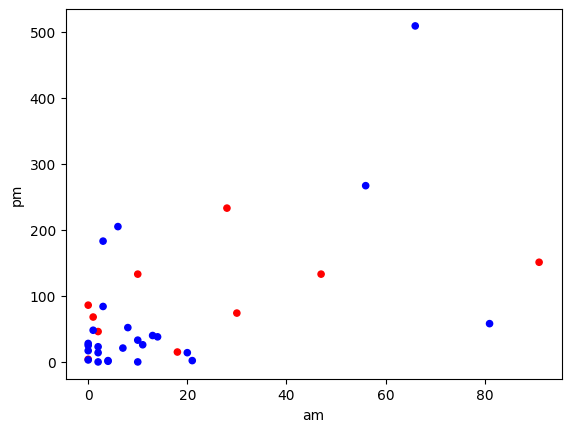

In [12]:
df.plot.scatter(x='am', y='pm', color=df["target"].apply(func=lambda x: "red" if x == "weekend" else "blue"))

No, it's not easy

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [13]:
model = LogisticRegression(random_state=21, fit_intercept=False)

In [14]:
model.fit(df[["am", "pm"]].values, df["target"].apply(func=lambda x: 2 * (x == "weekend") - 1))

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
to_word = np.vectorize(lambda x: "weekend" if x == 1 else "working day")
df["predict"] = to_word(model.predict(df[["am", "pm"]].values))

In [16]:
df.to_csv("./data/am_pm.csv")

<Axes: xlabel='am', ylabel='pm'>

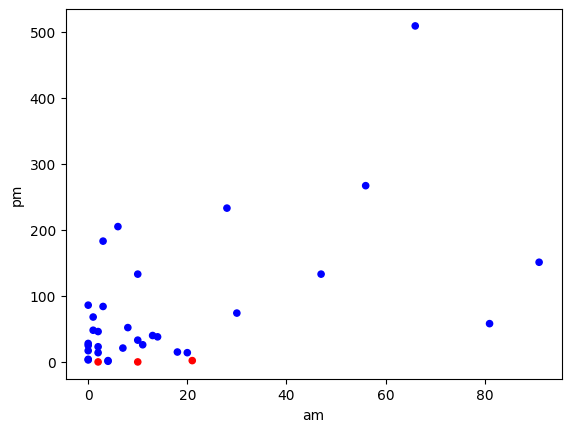

In [17]:
df.plot.scatter(x="am", y="pm", color=df["predict"].apply(func=lambda x: "red" if x == "weekend" else "blue"))

No, it's not good

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [18]:
accuracy = accuracy_score(df["target"].apply(func=lambda x: 1 if x == "weekend" else 0), df["predict"].apply(func=lambda x: 1 if x == "weekend" else 0))
accuracy

0.6285714285714286

In [19]:
most_common_class = 2 * (df["target"].value_counts().idxmax() == "weekend") - 1
accuracy = accuracy_score(df["target"].apply(func=lambda x: 2 * (x == "weekend") - 1), df["target"].apply(func=lambda x: most_common_class))
accuracy

0.7142857142857143

No, it's not good

# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv("./data/am_pm.csv", header=0, parse_dates=["date"])

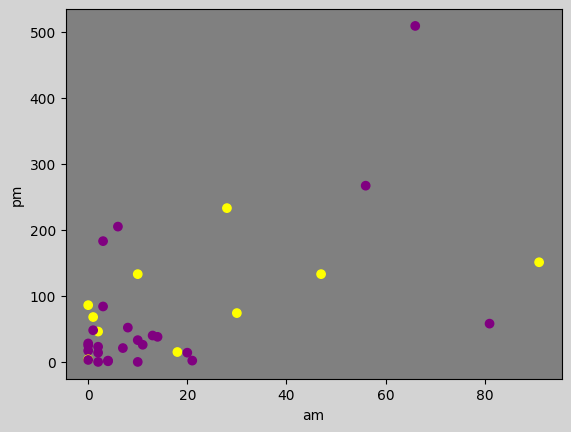

In [3]:
colors = df["target"].apply(func=lambda x: "yellow" if x == "weekend" else "purple")
plt.scatter(df["am"].values, df["pm"].values, c=colors)
plt.gca().set_facecolor("grey")
plt.gca().set_xlabel("am")
plt.gca().set_ylabel("pm")
plt.gcf().set_facecolor("lightgrey")

In [4]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(df[["am", "pm"]].values, df["target"].apply(func=lambda x: 2 * (x == "weekend") - 1))

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [5]:
x_min, x_max, y_min, y_max = df["am"].values.min() - 1, df["am"].values.max() + 1, df["pm"].values.min() - 1, df["pm"].values.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

predict = model.predict(np.c_[xx.ravel(), yy.ravel()])
predict = predict.reshape(xx.shape)

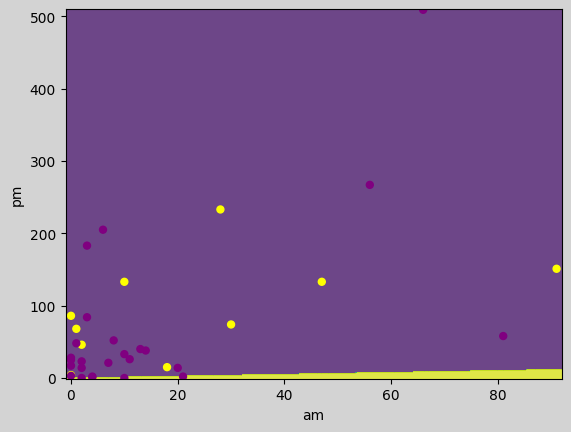

In [6]:
plt.contourf(xx, yy, predict, alpha=0.8)
plt.gca().set_xlabel("am")
plt.gca().set_ylabel("pm")
plt.gcf().set_facecolor("lightgrey")
plt.scatter(df["am"].values, df["pm"].values, s=25, c=colors)

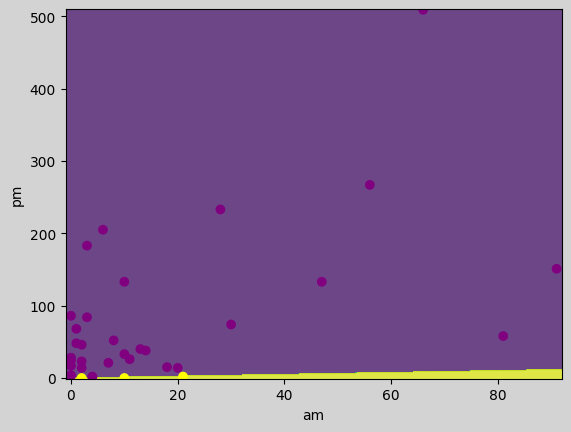

In [7]:
plt.contourf(xx, yy, predict, alpha=0.8)
plt.gca().set_xlabel("am")
plt.gca().set_ylabel("pm")
plt.gcf().set_facecolor("lightgrey")
plt.scatter(df["am"].values, df["pm"].values, c=df["predict"].apply(func=lambda x: "yellow" if x == "weekend" else "purple"))

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [8]:
scaler = StandardScaler()
painter = np.vectorize(lambda x: "yellow" if x == 1 else "purple")
new_values = scaler.fit_transform(df[["am", "pm"]].values)
new_values

array([[ 0.20069005, -0.71990365],
       [-0.65591383, -0.07182203],
       [ 0.07219947, -0.59225121],
       [-0.61308363, -0.51369586],
       [-0.69874402, -0.49405703],
       [-0.69874402, -0.46459877],
       [-0.27044208, -0.41550168],
       [-0.61308363, -0.60207063],
       [ 0.5861618 , -0.01290552],
       [ 0.50050141,  1.54838202],
       [-0.52742324, -0.71990365],
       [-0.52742324, -0.72972307],
       [-0.69874402, -0.57261237],
       [-0.1419515 , -0.34676575],
       [-0.35610247, -0.22893273],
       [ 3.19880362,  0.7431897 ],
       [ 1.31427509,  0.56644017],
       [-0.22761189, -0.48423761],
       [ 2.77050168, -0.17001622],
       [-0.61308363, -0.73954249],
       [-0.09912131, -0.36640459],
       [-0.57025344,  0.08528866],
       [-0.69874402,  0.1049275 ],
       [-0.27044208,  0.56644017],
       [-0.57025344,  1.05741109],
       [ 1.69974683,  1.88224224],
       [-0.44176286,  1.2734383 ],
       [ 2.12804877,  4.25854152],
       [-0.27044208,

In [9]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(new_values, df["target"].apply(lambda x: 2 * (x == "weekend") - 1))

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
predict_values = model.predict(new_values)
accuracy = accuracy_score(df["target"].apply(lambda x: 2 * (x == "weekend") - 1), predict_values)
accuracy

0.7428571428571429

Did it get better than a naive classifier with the most popular class?
<br>Answer: yes, it gets better

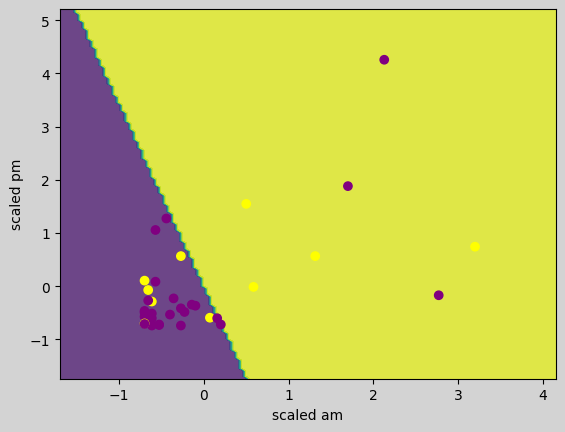

In [11]:
x_min, x_max, y_min, y_max = new_values[:, 0].min() - 1, new_values[:, 0].max() + 1, new_values[:, 1].min() - 1, new_values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
predicts = model.predict(np.c_[xx.ravel(), yy.ravel()])

plt.contourf(xx, yy, predicts.reshape(xx.shape), alpha=0.8)
plt.gca().set_xlabel("scaled am")
plt.gca().set_ylabel("scaled pm")
plt.gcf().set_facecolor("lightgrey")
plt.scatter(new_values[:, 0], new_values[:, 1], c=colors)

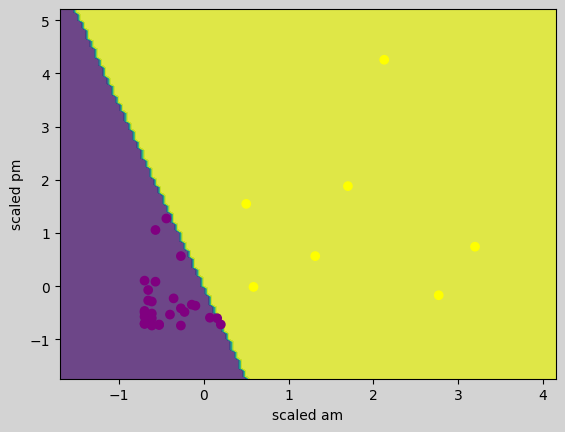

In [12]:
plt.contourf(xx, yy, predicts.reshape(xx.shape), alpha=0.8)
plt.gca().set_xlabel("scaled am")
plt.gca().set_ylabel("scaled pm")
plt.gcf().set_facecolor("lightgrey")
plt.scatter(new_values[:, 0], new_values[:, 1], c=painter(predict_values))

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [13]:
model = SVC(probability=True, random_state=21, kernel='poly')
model.fit(new_values, df["target"].apply(lambda x: 2 * (x == "weekend") - 1))

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
## Доступные значения kernels и их результаты: ‘linear’: 0.7142857142857143, ‘poly’: 0.7428571428571429, ‘rbf’: 0.7428571428571429, ‘sigmoid’: 0.6857142857142857
predict_values = model.predict(new_values)
accuracy = accuracy_score(df["target"].apply(lambda x: 2 * (x == "weekend") - 1), predict_values)
accuracy

0.7428571428571429

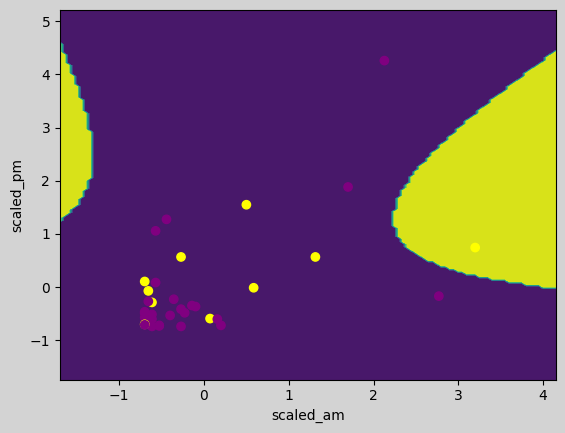

In [15]:
predicts = model.predict(np.c_[xx.ravel(), yy.ravel()])
plt.contourf(xx, yy, predicts.reshape(xx.shape))
plt.gcf().set_facecolor("lightgrey")
plt.gca().set_xlabel("scaled_am")
plt.gca().set_ylabel("scaled_pm")
plt.scatter(new_values[:, 0], new_values[:, 1], c=colors)

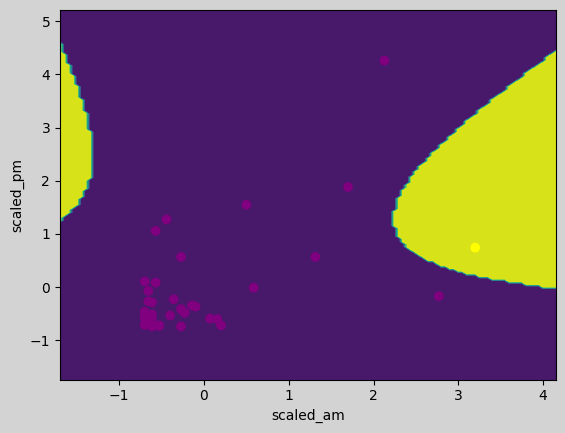

In [16]:
plt.contourf(xx, yy, predicts.reshape(xx.shape))
plt.gca().set_xlabel("scaled_am")
plt.gca().set_ylabel("scaled_pm")
plt.gcf().set_facecolor("lightgrey")
plt.scatter(new_values[:, 0], new_values[:, 1], c=painter(predict_values))

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [17]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(new_values, df["target"].apply(lambda x: 2 * (x == "weekend") - 1).values)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
## Какая точность для различных значений max_depth {4: 0.9428571428571428, 5: 0.9714285714285714, 6: 1}
predict_values = model.predict(new_values)
accuracy = accuracy_score(df["target"].apply(lambda x: 2 * (x == "weekend") - 1).values, predict_values)
accuracy

0.9428571428571428

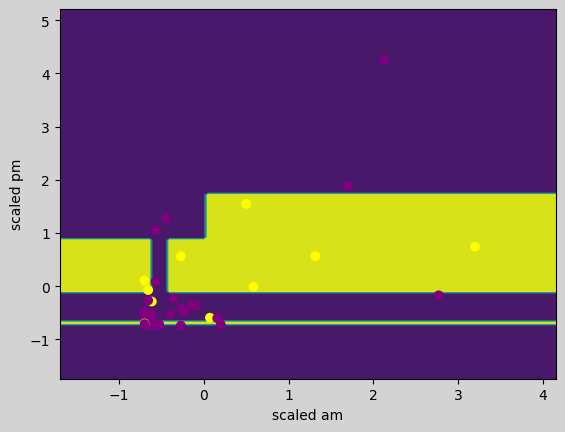

In [19]:
predicts = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, predicts)
plt.gcf().set_facecolor("lightgrey")
plt.gca().set_xlabel("scaled am")
plt.gca().set_ylabel("scaled pm")
plt.scatter(new_values[:, 0], new_values[:, 1], c=colors)

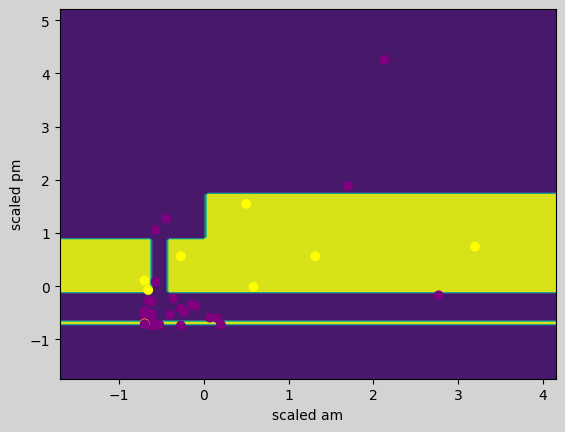

In [20]:
plt.contourf(xx, yy, predicts)
plt.gcf().set_facecolor("lightgrey")
plt.gca().set_xlabel("scaled am")
plt.gca().set_ylabel("scaled pm")
plt.scatter(new_values[:, 0], new_values[:, 1], c=painter(predict_values))

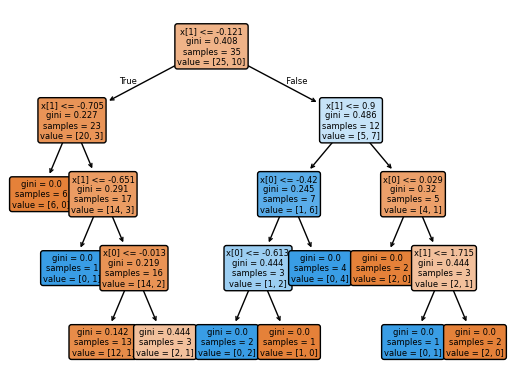

In [21]:
plot_tree(model, filled=True, rounded=True, fontsize=6)
plt.show()

How many leaves in the visualized tree label days as working days?<br>
Answer: 6

# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [23]:
df = pd.read_csv("./data/checker_submits.csv", header=0, parse_dates=["timestamp"])
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.weekday
df.drop(axis=1, columns=["timestamp"], inplace=True)

df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [24]:
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(X=df[["uid", "labname"]])
feature_names = encoder.get_feature_names_out(input_features=df.columns[:2])
new_features = pd.DataFrame(data=encoded_columns, columns=feature_names)
df.drop(axis=1, columns=["uid", "labname"], inplace=True)

df = pd.concat([new_features, df], axis=1, join="inner").astype(int)
df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,5,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,5,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,5,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,5,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,9,20,3
1682,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,6,20,3
1683,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,7,20,3
1684,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,8,20,3


In [25]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X=df.iloc[:, :-1]), columns=df.columns[:-1])
scaled_df["dayofweek"] = df["dayofweek"]
scaled_df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,-0.193748,0.879131,-0.788667,-2.562352,4
1,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,-0.193748,0.879131,-0.756764,-2.562352,4
2,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,-0.193748,0.879131,-0.724861,-2.562352,4
3,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,-0.193748,0.879131,-0.692958,-2.562352,4
4,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,-0.193748,0.879131,-0.661055,-2.562352,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,5.161332,-1.137487,-0.533442,0.945382,3
1682,-0.034462,5.970944,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,5.161332,-1.137487,-0.629151,0.945382,3
1683,-0.034462,5.970944,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,5.161332,-1.137487,-0.597248,0.945382,3
1684,-0.034462,5.970944,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,5.161332,-1.137487,-0.565345,0.945382,3


In [26]:
scaled_df.to_csv("./data/dayofweek.csv")

In [27]:
most_popular = scaled_df.groupby(list(scaled_df.columns.values[:-1]))["dayofweek"].count().max()
accuracy = float(most_popular / scaled_df.count().iloc[0])
accuracy

0.0017793594306049821

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [28]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(scaled_df.iloc[:, :-1], scaled_df.iloc[:, -1])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
predict_values = model.predict(scaled_df.iloc[:, :-1])
accuracy = accuracy_score(scaled_df.iloc[:, -1], predict_values)
accuracy

0.6571767497034401

In [30]:
def function(coef, names, n):
    pairs = np.c_[coef, names]
    sorted_pairs = sorted(pairs, key=lambda x: abs(x[0]), reverse=True)

    features = [x[1] for x in sorted_pairs]
    importances = [abs(x[0]) for x in sorted_pairs]

    plt.figure(figsize=(15, 10))
    plt.gcf().set_facecolor("#f9f7f7")
    plt.gca().set_facecolor("#f9f7f7")
    plt.gca().set_title("Importances of the features", fontsize=15)
    plt.gca().set_xlabel("Absolute value of a coefficient", fontsize=12)
    plt.gca().set_ylabel("Name of a feature", fontsize=12)
    plt.barh(features[:n], importances[:n], color="skyblue")

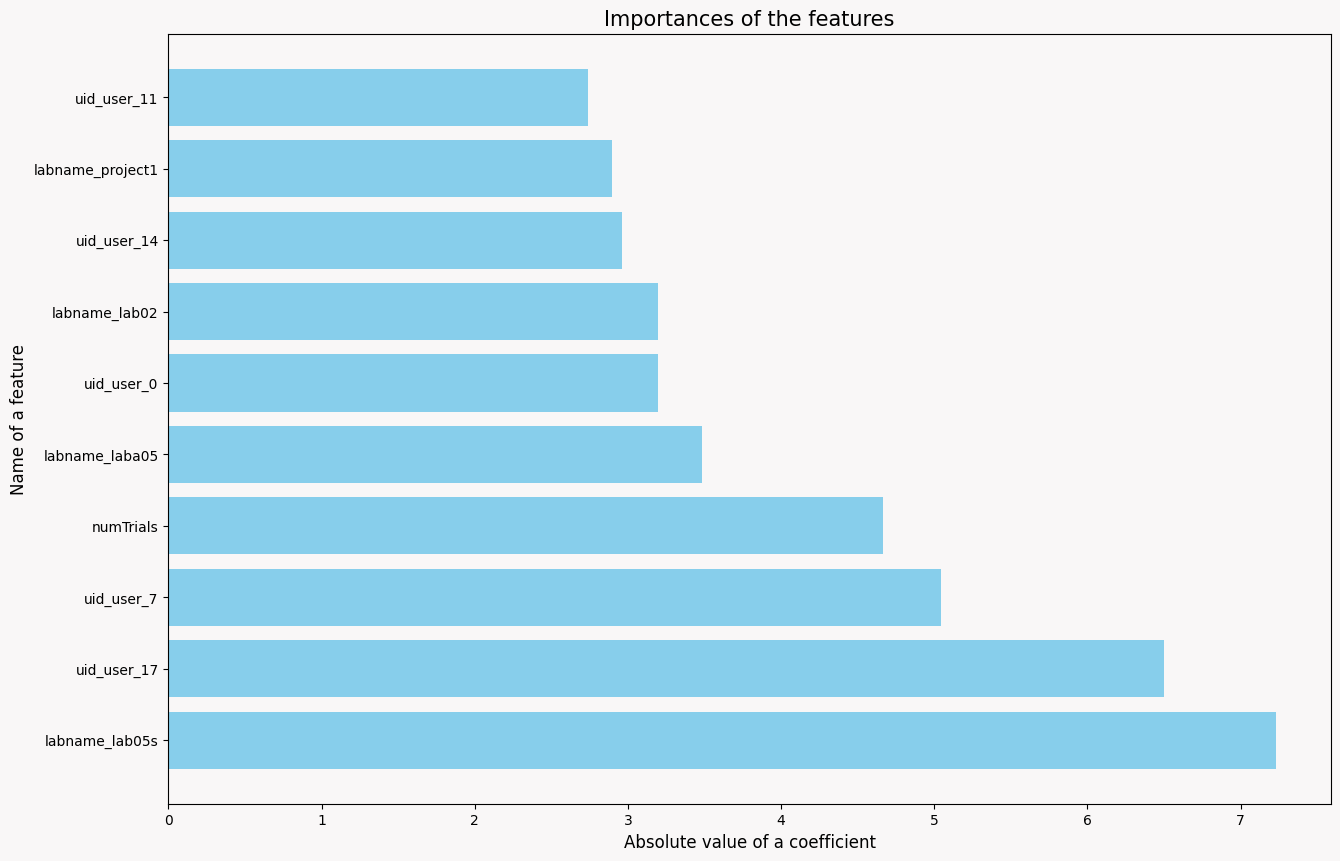

In [31]:
importance = [sum([abs(y) for y in x]) for x in model.coef_.T]
function(importance, scaled_df.columns.values[:-1], 10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [32]:
model = SVC(kernel="linear", probability=True, random_state=21)
model.fit(scaled_df.iloc[:, :-1], scaled_df.iloc[:, -1])

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
## accuracy for different kernels: {linear: 0.7734282325029656, poly: 0.7206405693950177,
##                                  rbf: 0.7621589561091341, sigmoid: 0.566429418742586}
predicts = model.predict(scaled_df.iloc[:, :(-1)])
accuracy = accuracy_score(scaled_df.iloc[:, -1], predicts)
accuracy

0.7734282325029656

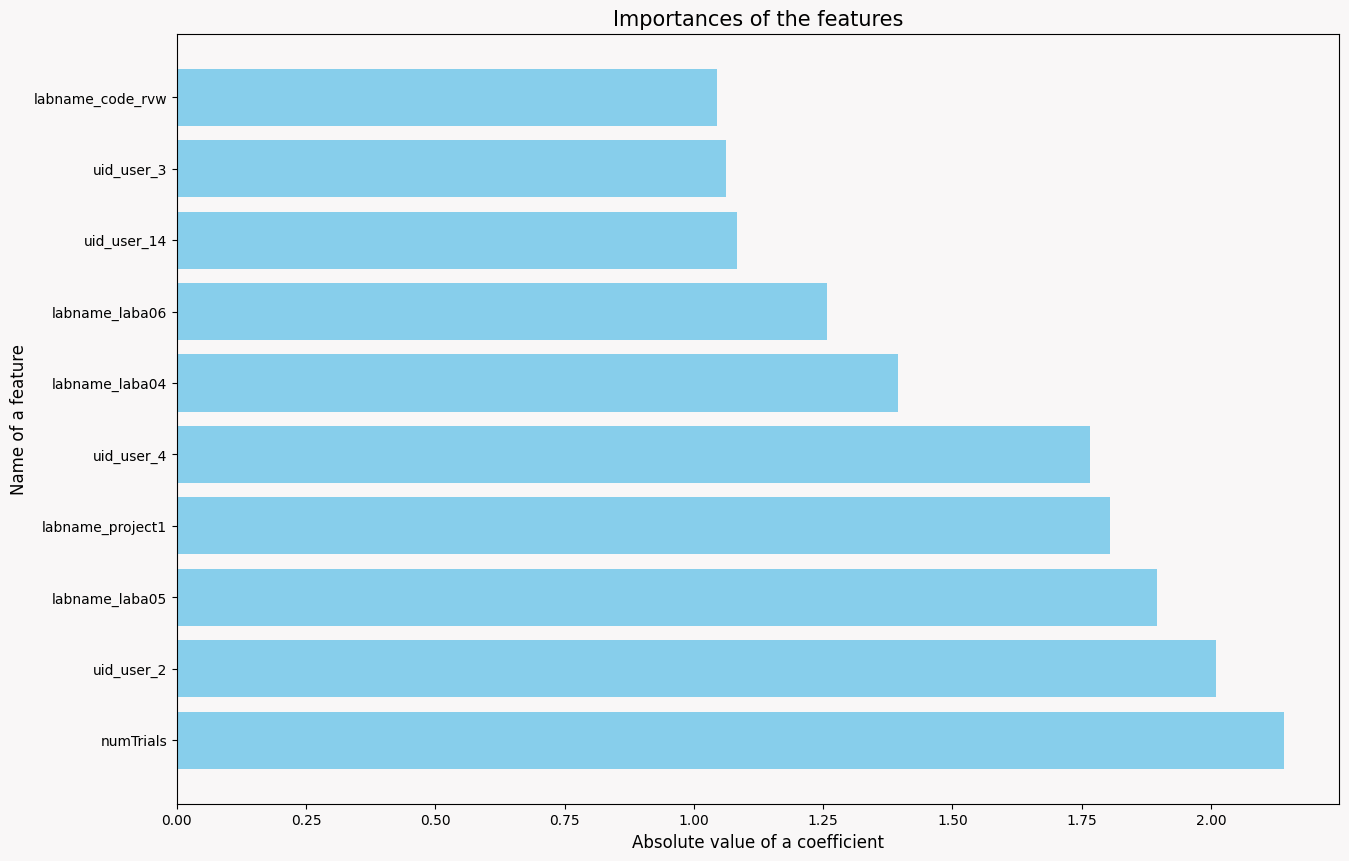

In [34]:
sample = SVC(kernel="linear", probability=True, random_state=21)
classifier = OneVsRestClassifier(sample)
classifier.fit(scaled_df.iloc[:, :(-1)], scaled_df.iloc[:, -1])
w = np.zeros(shape=(43,))
for estimator in classifier.estimators_:
    w += np.vectorize(lambda x: abs(x))(estimator.coef_[0])
function(w, scaled_df.columns.values[:(-1)], 10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [35]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
model.fit(scaled_df.iloc[:, :(-1)], scaled_df.iloc[:, -1])

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,21
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
## accuracies for different max_depth: {4: 0.5516014234875445, 5: 0.6109134045077106, 6: 0.6637010676156584, 7: 0.7064056939501779, 8: 0.7502965599051008}
predicts = model.predict(scaled_df.iloc[:, :(-1)])
accuracy = accuracy_score(scaled_df.iloc[:, -1], predicts)
accuracy

0.5516014234875445

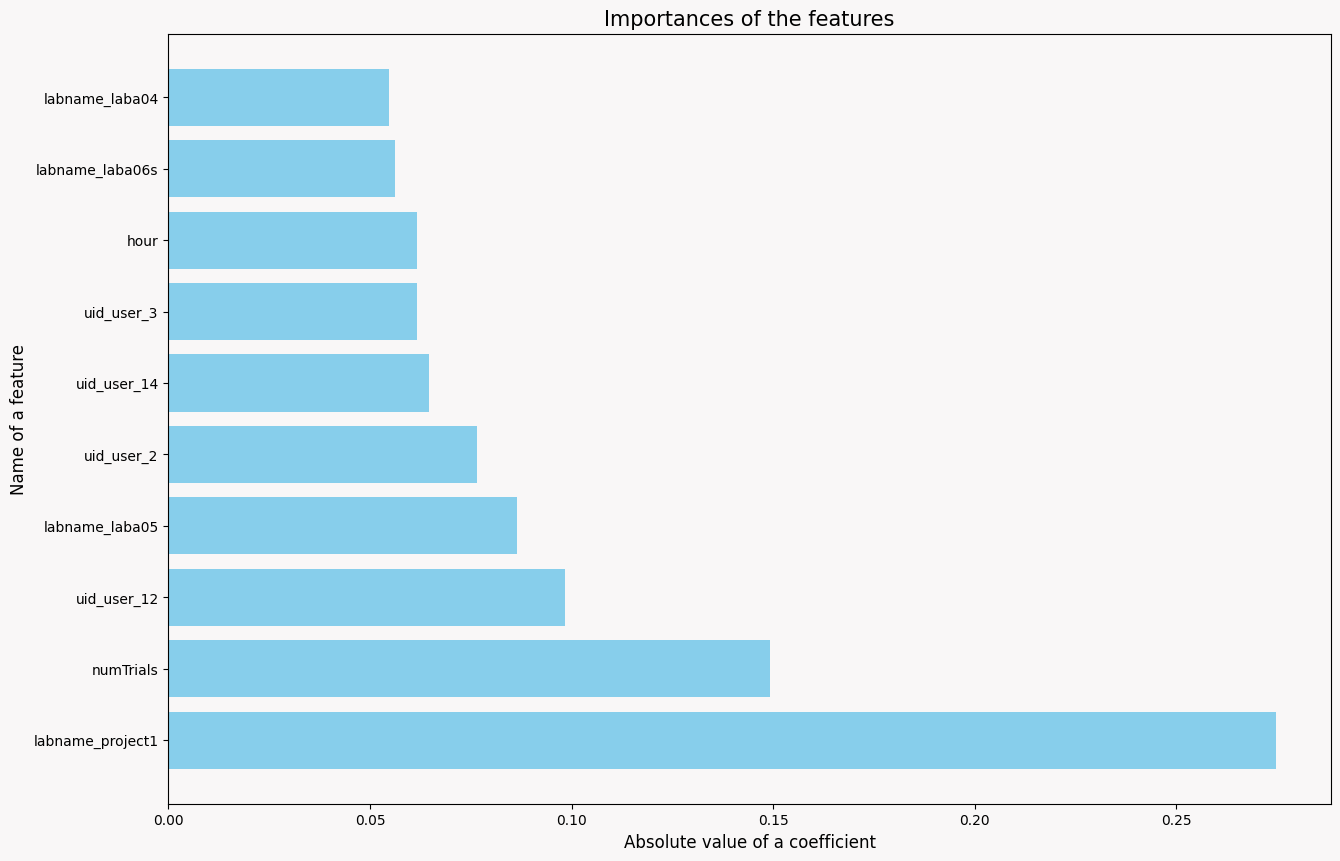

In [37]:
function(model.feature_importances_, scaled_df.columns.values[:(-1)], 10)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [38]:
model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
model.fit(scaled_df.iloc[:, :(-1)], scaled_df.iloc[:, -1])

,n_estimators,100
,criterion,'gini'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
## accuracies for different values of max_depth and n_estimators {(100, 20): 0.9976275207591934, (100, 15): 0.9804270462633452, 
##                                                                (90, 25): 0.9988137603795967, (80, 25): 0.9988137603795967), (60, 25): 0.9994068801897983}
predicts = model.predict(scaled_df.iloc[:, :(-1)])
accuracy = accuracy_score(scaled_df.iloc[:, (-1)], predicts)
accuracy

0.9988137603795967

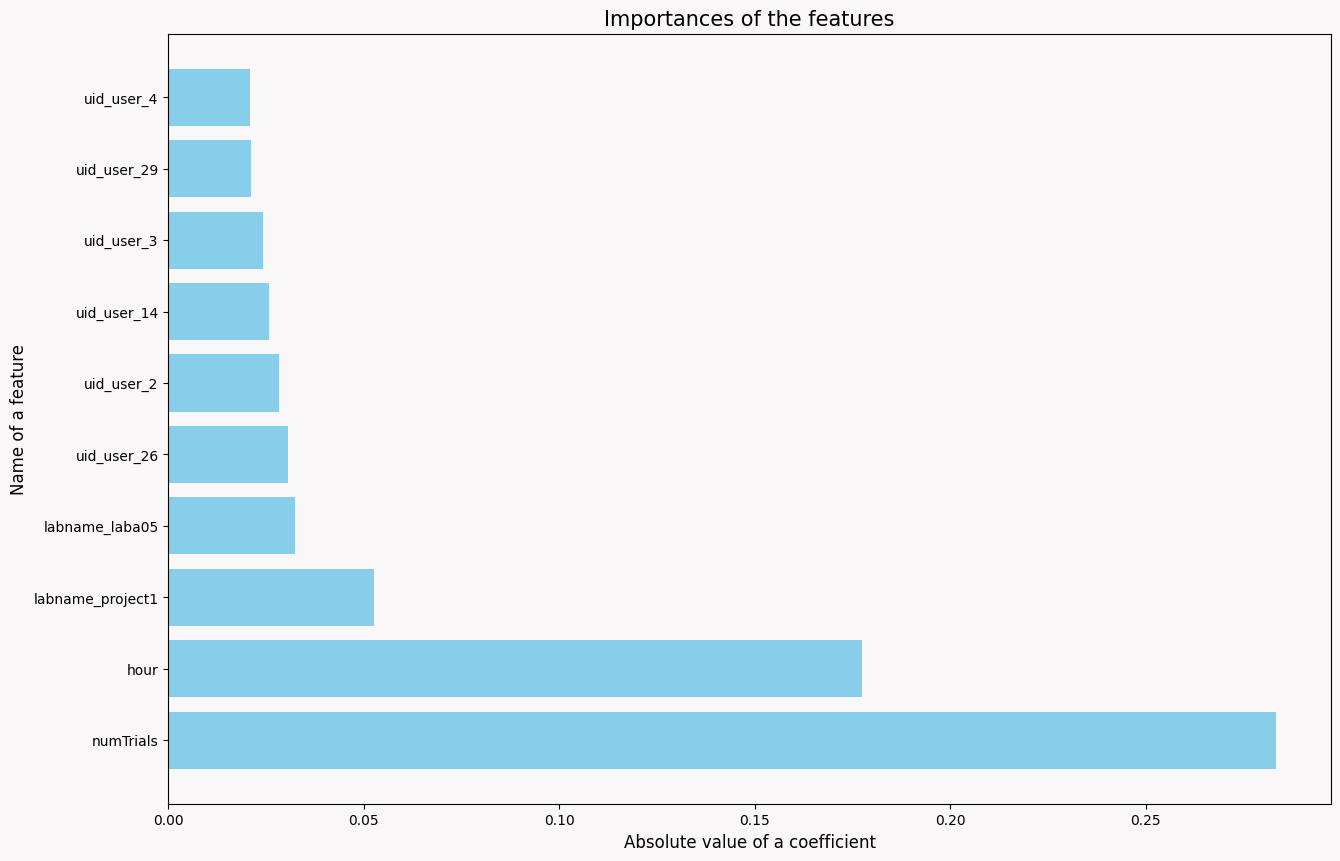

In [40]:
function(model.feature_importances_, scaled_df.columns.values[:(-1)], 10)

# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [41]:
import pandas as pd
import numpy as np
import joblib as jb
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [42]:
df = pd.read_csv("./data/dayofweek.csv", header=0, sep=",").drop(axis=1, columns=["Unnamed: 0"])
df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,-0.193748,0.879131,-0.788667,-2.562352,4
1,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,-0.193748,0.879131,-0.756764,-2.562352,4
2,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,-0.193748,0.879131,-0.724861,-2.562352,4
3,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,-0.193748,0.879131,-0.692958,-2.562352,4
4,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,-0.193748,0.879131,-0.661055,-2.562352,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.034462,-0.167478,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,5.161332,-1.137487,-0.533442,0.945382,3
1682,-0.034462,5.970944,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,5.161332,-1.137487,-0.629151,0.945382,3
1683,-0.034462,5.970944,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,5.161332,-1.137487,-0.597248,0.945382,3
1684,-0.034462,5.970944,-0.209673,-0.054538,-0.173011,-0.192095,-0.291448,-0.100924,-0.139094,-0.143461,...,-0.14771,-0.343565,-0.256397,-0.389409,-0.171184,5.161332,-1.137487,-0.565345,0.945382,3


In [43]:
## without stratify=True
## X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :(-1)], df.iloc[:, (-1)], test_size=0.2, random_state=21)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :(-1)], df.iloc[:, (-1)], test_size=0.2, random_state=21, stratify=df.iloc[:, (-1)].values)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [44]:
size = len(y_train)
percents = (y_train.value_counts() * 100 / size).sort_index()
percents

dayofweek
0     8.086053
1    16.246291
2     8.827893
3    23.442136
4     6.157270
5    16.097923
6    21.142433
Name: count, dtype: float64

In [45]:
size = len(y_test)
percents = (y_test.value_counts() * 100 / size).sort_index()
percents

dayofweek
0     7.988166
1    16.272189
2     8.875740
3    23.668639
4     6.213018
5    15.976331
6    21.005917
Name: count, dtype: float64

## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [46]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
predicts = model.predict(X_test)
accuracy = accuracy_score(y_test, predicts)
accuracy

0.6420118343195266

### b. SVM

In [48]:
model = SVC(kernel="linear", probability=True, random_state=21)
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [49]:
predicts = model.predict(X_test)
accuracy = accuracy_score(y_test, predicts)
accuracy

0.7514792899408284

### c. Decision tree

In [50]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,21
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [51]:
predicts = model.predict(X_test)
accuracy = accuracy_score(y_test, predicts)
accuracy

0.5295857988165681

### d. Random forest

In [52]:
model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
predicts = model.predict(X_test)
accuracy = accuracy_score(y_test, predicts)
accuracy

0.9319526627218935

**Random forest has the largest difference**

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [54]:
warnings.filterwarnings("ignore", category=FutureWarning)

model = LogisticRegression(solver="liblinear", random_state=21, fit_intercept=False)
accuracy_scores = cross_val_score(model, df.iloc[:, :(-1)], df.iloc[:, (-1)], cv=10)
print(f"Mean: {accuracy_scores.mean()}, standard deviation: {accuracy_scores.std()}")

warnings.filterwarnings("default", category=FutureWarning)

Mean: 0.4049239222316145, standard deviation: 0.1579723244595928


### b. SVM

In [55]:
model = SVC(kernel="linear", probability=True, random_state=21)
accuracy_scores = cross_val_score(model, df.iloc[:, :(-1)], df.iloc[:, (-1)], cv=10)
print(f"Mean: {accuracy_scores.mean()}, standard deviation: {accuracy_scores.std()}")

Mean: 0.5485946745562129, standard deviation: 0.17230647466491938


### c. Decision tree

In [56]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
accuracy_scores = cross_val_score(model, df.iloc[:, :(-1)], df.iloc[:, (-1)], cv=10)
print(f"Mean: {accuracy_scores.mean()}, standard deviation: {accuracy_scores.std()}")

Mean: 0.3883523527754297, standard deviation: 0.11835394295385691


### d. Random forest

In [57]:
model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
accuracy_scores = cross_val_score(model, df.iloc[:, :(-1)], df.iloc[:, (-1)], cv=10)
print(f"Mean: {accuracy_scores.mean()}, standard deviation: {accuracy_scores.std()}")

Mean: 0.6560545224006762, standard deviation: 0.18253763161728986


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [58]:
model = RandomForestClassifier(n_estimators=80, max_depth=23, random_state=21)
accuracy_scores = cross_val_score(model, df.iloc[:, :(-1)], df.iloc[:, (-1)], cv=10)
print(f"Mean: {accuracy_scores.mean()}, standard deviation: {accuracy_scores.std()}")

Mean: 0.6590166244012398, standard deviation: 0.16489216950382996


In [59]:
model.fit(X_train, y_train)

predicts = model.predict(X_test)
accuracy = accuracy_score(y_test, predicts)

accuracy

0.9260355029585798

<BarContainer object of 10 artists>

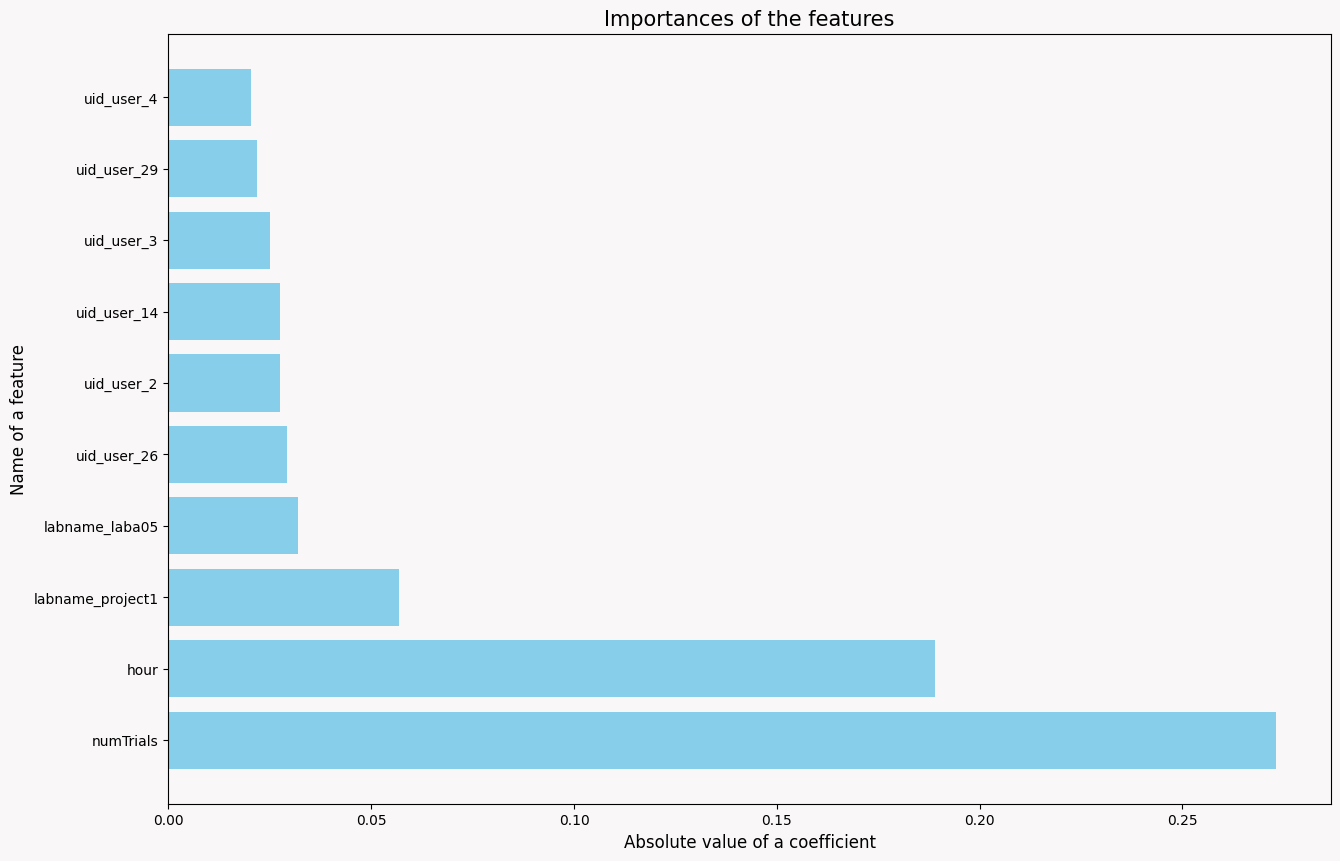

In [60]:
pairs = np.c_[model.feature_importances_, df.columns.values[:(-1)]]
sorted_pairs = sorted(pairs, key=lambda x: abs(x[0]), reverse=True)

features = [x[1] for x in sorted_pairs]
importances = [abs(x[0]) for x in sorted_pairs]

plt.figure(figsize=(15, 10))
plt.gcf().set_facecolor("#f9f7f7")
plt.gca().set_facecolor("#f9f7f7")
plt.gca().set_title("Importances of the features", fontsize=15)
plt.gca().set_xlabel("Absolute value of a coefficient", fontsize=12)
plt.gca().set_ylabel("Name of a feature", fontsize=12)
plt.barh(features[:10], importances[:10], color="skyblue")

In [61]:
jb.dump(model, "./trained_model.joblib")

['./trained_model.joblib']

In [62]:
loaded_model = jb.load("./trained_model.joblib")
predicts = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, predicts)
accuracy

0.9260355029585798

# Day 08. Exercise 04
# Regression

## 0. Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [64]:
df = pd.read_csv("./data/checker_regression.csv", header=0).fillna(0)
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [65]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:(-1)], df.iloc[:, (-1)], test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [66]:
def crossval(n_splits, X, y, model):
    RMSE = lambda y, predicts: np.sqrt(mean_squared_error(y, predicts))

    KF = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    
    rmse_values = []
    
    for train_index, test_index in KF.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        train_predicts = model.predict(X_train)
        train_RMSE = RMSE(y_train, train_predicts)
        test_predicts = model.predict(X_test)
        test_RMSE = RMSE(y_test, test_predicts)
        rmse_values.append(test_RMSE)

        print(f"train - {train_RMSE}   |   test - {test_RMSE}")
    print(f"Average RMSE on crossval is {sum(rmse_values) / len(rmse_values)}")

In [67]:
model_1 = LinearRegression(fit_intercept=True)
crossval(5, df.iloc[:, 1:(-1)], df.iloc[:, (-1)], model_1)

train - 43.621337395116164   |   test - 54.11312189353347
train - 48.2426341536303   |   test - 37.293129449276385
train - 48.10672472380803   |   test - 36.41981996353924
train - 48.44559518326799   |   test - 36.008033267644436
train - 39.294971393683504   |   test - 69.86889732512056
Average RMSE on crossval is 46.74060037982282


In [68]:
model_2 = DecisionTreeRegressor(random_state=21, max_depth=6)
crossval(5, df.iloc[:, 1:(-1)], df.iloc[:, (-1)], model_2)

train - 5.0383142672661565   |   test - 51.98454669051232
train - 7.065779921681636   |   test - 14.350000000000001
train - 0.0   |   test - 56.82286250888548
train - 6.4119092823558645   |   test - 8.198700213154838
train - 1.0925989206628806   |   test - 73.97746703983334
Average RMSE on crossval is 41.066715290477205


In [69]:
model_3 = RandomForestRegressor(random_state=21, n_estimators=69, max_depth=25)
crossval(5, df.iloc[:, 1:(-1)], df.iloc[:, (-1)], model_3)

train - 13.298363437390641   |   test - 42.303034142205604
train - 16.531431047091466   |   test - 17.21521739130435
train - 12.776645726570345   |   test - 46.46476941576592
train - 15.931943606121893   |   test - 19.667633776290057
train - 11.002047046486185   |   test - 54.680905932448844
Average RMSE on crossval is 36.066312131602956


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [70]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
predicts_1, predicts_2, predicts_3 = model_1.predict(X_test), model_2.predict(X_test), model_3.predict(X_test)

In [71]:
def plot_draw(predict):
    plt.figure(figsize=(15, 10), facecolor="#f9f7f7")
    plt.scatter(y_test, predict, color="blue", s=30)
    plt.plot(y_test, y_test, color="red")
    plt.gca().set_facecolor("#f9f7f7")
    plt.gca().set_xlabel("Actual average difference", fontsize=12)
    plt.gca().set_xlabel("Prediction made by the a model", fontsize=12)

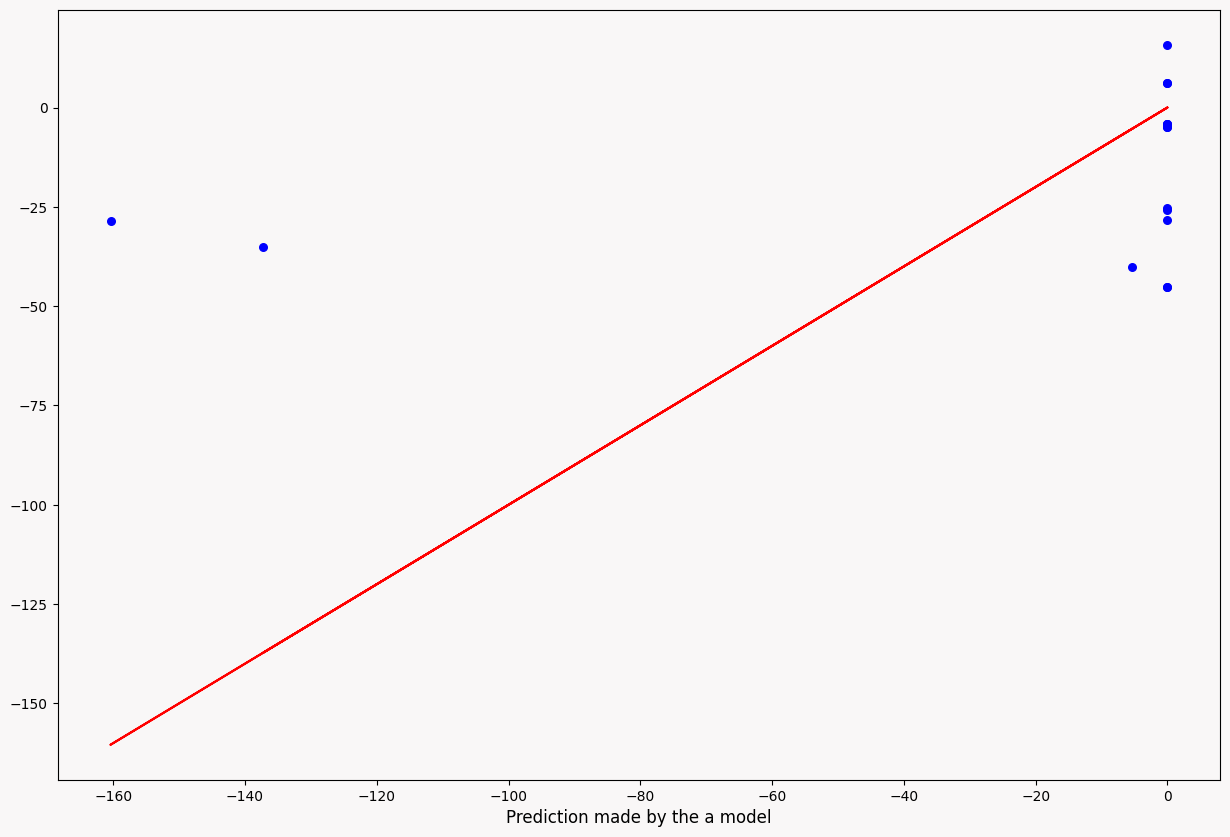

In [72]:
plot_draw(predicts_1)

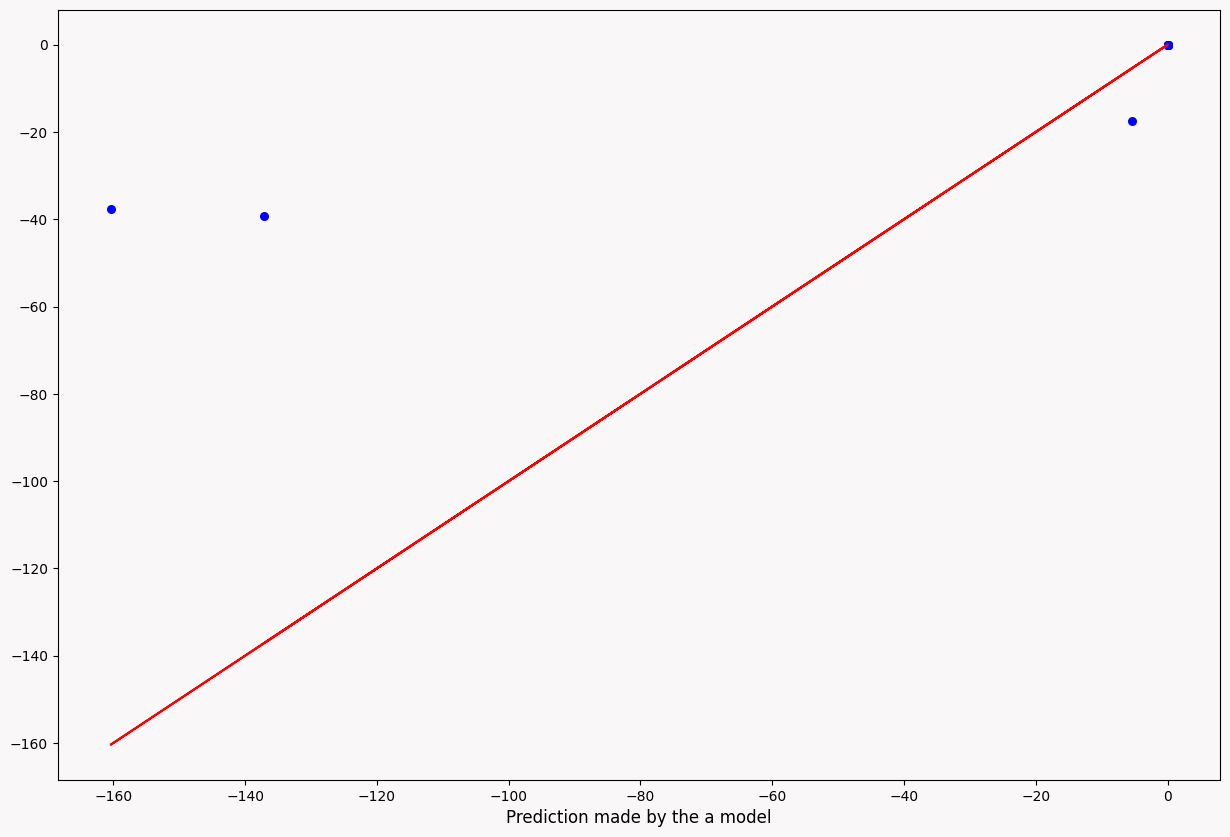

In [73]:
plot_draw(predicts_2)

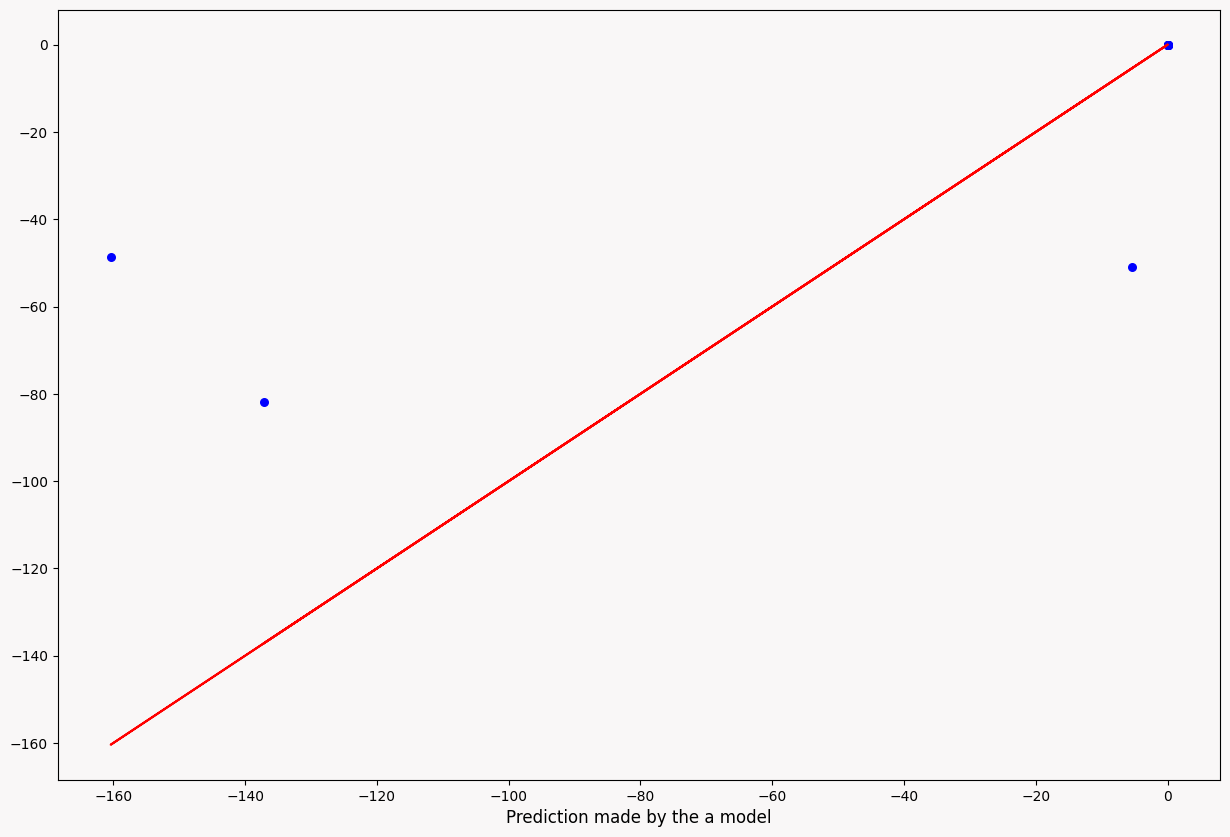

In [74]:
plot_draw(predicts_3)

В идеальном случае все синие точки должны лежать на прямой, график которой совпадает с графиком функции $y = x$

# Day 08. Exercise 05
# Clustering

## 0. Imports

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from itertools import product
from random import sample
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [76]:
df = pd.read_csv("./data/regression.csv", header=0).drop(axis=1, columns=["pageviews"])
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [77]:
model = KMeans(random_state=21, n_clusters=3)
model.fit(df.iloc[:, 1:])

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,21
,copy_x,True
,algorithm,'lloyd'


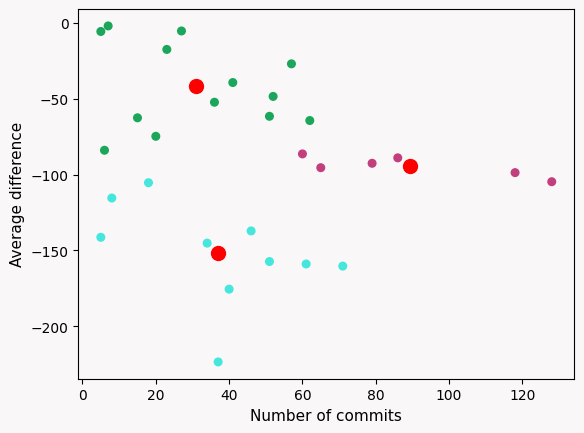

In [78]:
points = model.cluster_centers_.T
labels = model.labels_
l = max(labels) + 1
colors = sample([''.join(x) for x in product(list("0123456789ABCDEF"), repeat=6)], l)
colors = [("#" + color) for color in colors]

fig, ax = plt.subplots(1, 1)
ax.scatter(df.iloc[:, 1], df.iloc[:, 2], color=[colors[label] for label in labels], s=30)
ax.scatter(points[0], points[1], s=100, color="red")
ax.set_xlabel("Number of commits", fontsize=11)
ax.set_ylabel("Average difference", fontsize=11)
ax.set_facecolor("#f9f7f7")
fig.set_facecolor("#f9f7f7")

In [79]:
score = silhouette_score(df.iloc[:, 1:], model.labels_)
float(score)

0.4454402135233297

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [80]:
model = DBSCAN(eps=20, min_samples=2)
model.fit(df.iloc[:, 1:])

,eps,20
,min_samples,2
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


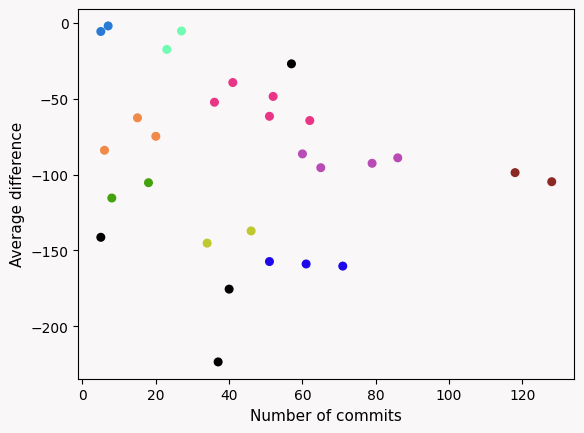

In [81]:
labels = model.labels_
l = max(labels) + 1
colors = sample([''.join(x) for x in product(list("abcdef0123456789"), repeat=6)], l)
colors = [('#' + color) for color in colors]
colors.append("#000000")


fig, ax = plt.subplots(1, 1)
ax.scatter(df.iloc[:, 1], df.iloc[:, 2], color=[colors[label] for label in labels], s=30)
ax.set_xlabel("Number of commits", fontsize=11)
ax.set_ylabel("Average difference", fontsize=11)
ax.set_facecolor("#f9f7f7")
fig.set_facecolor("#f9f7f7")

In [82]:
score = silhouette_score(df.iloc[:, 1:], labels)
score

0.38339641455696616

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [83]:
model = AgglomerativeClustering(n_clusters=5)
model.fit(df.iloc[:, 1:])

,n_clusters,5
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


Text(0, 0.5, 'Average difference')

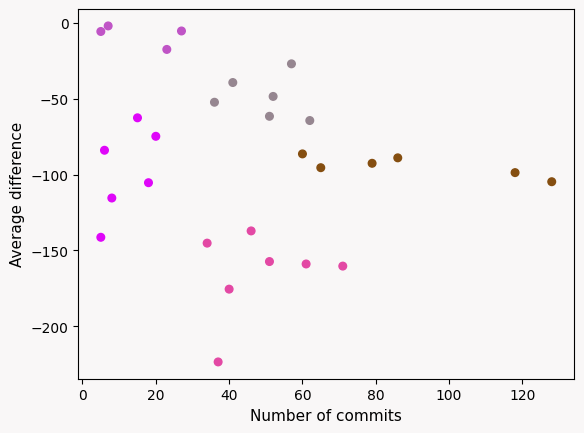

In [84]:
labels = model.labels_
l = max(labels) + 1
colors = sample([''.join(x) for x in product(list("0123456789ABCDEF"), repeat=6)], l)
colors = [('#' + x) for x in colors]

fig, ax = plt.subplots(1, 1)
fig.set_facecolor("#f9f7f7")
ax.scatter(df.iloc[:, 1], df.iloc[:, 2], s=30, color=[colors[label] for label in labels])
ax.set_facecolor("#f9f7f7")
ax.set_xlabel("Number of commits", fontsize=11)
ax.set_ylabel("Average difference", fontsize=11)

In [85]:
score = silhouette_score(df.iloc[:, 1:], labels)
score

0.46383015199381467

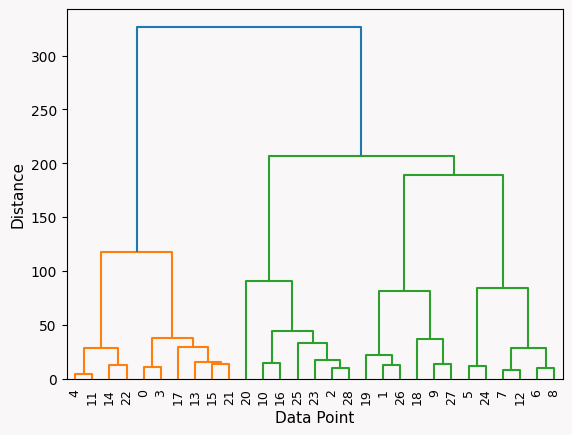

In [86]:
linked = sch.linkage(df.iloc[:, 1:], method="ward")
sch.dendrogram(linked, leaf_font_size=9, leaf_rotation=90)
plt.gca().set_facecolor("#f9f7f7")
plt.gca().set_xlabel("Data Point", fontsize=11)
plt.gca().set_ylabel("Distance", fontsize=11)
plt.gcf().set_facecolor("#f9f7f7")
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [87]:
def choose_best_model(model_class, model_params, name_p, par_range):
    values = []
    for p in par_range:
        model_params[name_p] = p
        model = model_class(**model_params)
        model.fit(df.iloc[:, 1:])

        curr_score = silhouette_score(df.iloc[:, 1:], model.labels_)
        values.append((p, float(curr_score)))
    
    values.sort(key=lambda x: x[1], reverse=True)

    model_params[name_p] = values[0][0]
    best_model = model_class(**model_params)
    best_model.fit(df.iloc[:, 1:])

    labels = best_model.labels_
    l = max(labels) + 1
    colors = sample([''.join(x) for x in product(list("0123456789ABCDEF"), repeat=6)], l)
    colors = [('#' + color) for color in colors]
    if model_class is DBSCAN:
        colors.append("#000000")

    fig, axes = plt.subplots(2, 1, figsize=(15, 10), facecolor="#f9f7f7")
    axes[0].set_facecolor("#f9f7f7")
    axes[0].set_xlabel(f"Value of {name_p}", fontsize=11)
    axes[0].set_ylabel("Silhouette score", fontsize=11)
    axes[0].plot([x[0] for x in values], [x[1] for x in values], color="red", linestyle="--")
    axes[1].set_facecolor("#f9f7f7")
    axes[1].set_xlabel("Number of commits")
    axes[1].set_ylabel("Average difference")
    axes[1].scatter(df.iloc[:, 1], df.iloc[:, 2], s=30, color=[colors[label] for label in labels])
    return axes

array([<Axes: xlabel='Value of eps', ylabel='Silhouette score'>,
       <Axes: xlabel='Number of commits', ylabel='Average difference'>],
      dtype=object)

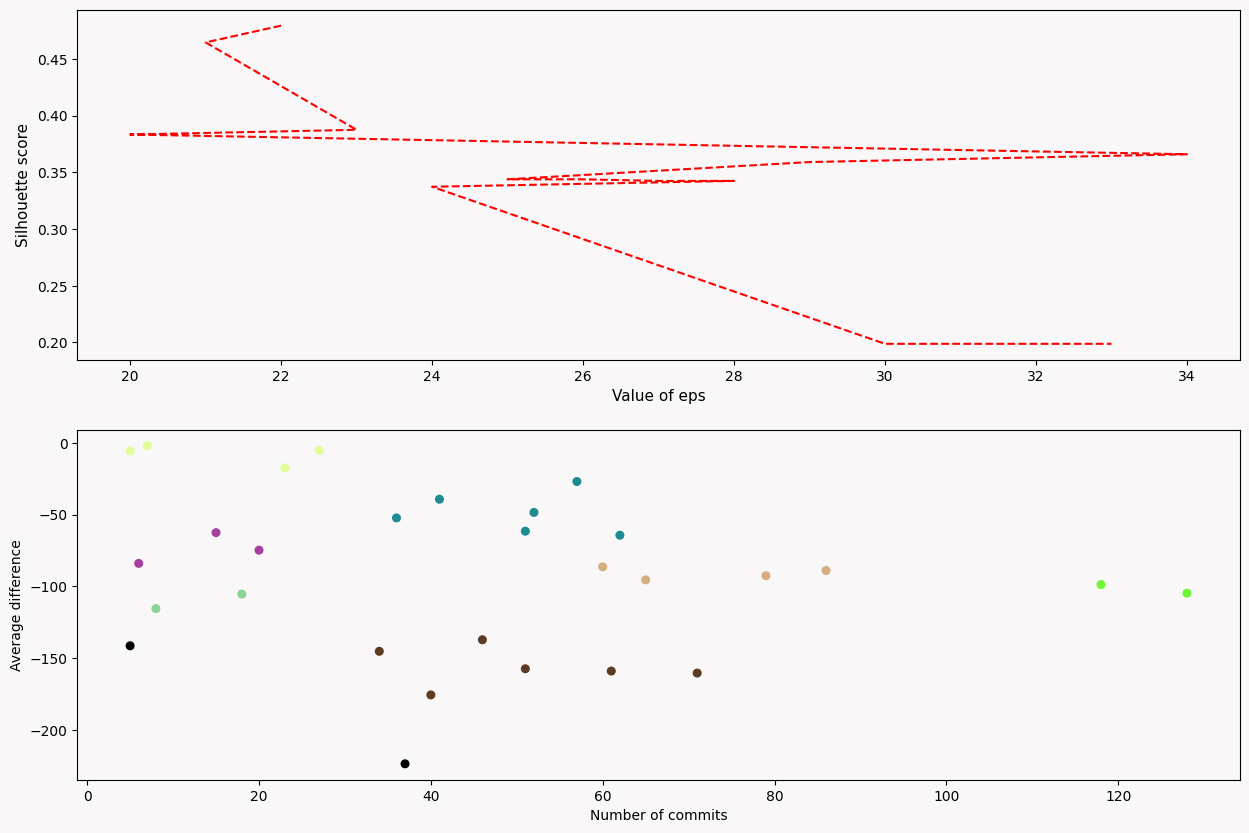

In [88]:
choose_best_model(DBSCAN, {"min_samples": 2}, "eps", range(20, 35, 1))